# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [4]:
import pandas as pd

# Carregando os arquivos CSV a partir do diretório específico
X_train = pd.read_csv(r'C:\Users\DELL\Documents\ebac\portifolios\x_train.csv')
y_train = pd.read_csv(r'C:\Users\DELL\Documents\ebac\portifolios\y_train.csv')
X_test = pd.read_csv(r'C:\Users\DELL\Documents\ebac\portifolios\x_test.csv')
y_test = pd.read_csv(r'C:\Users\DELL\Documents\ebac\portifolios\y_test.csv')

# Verificar os dados carregados
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_test:")
print(y_test.head())

# Verificar se o número de linhas condiz
assert X_train.shape[0] == y_train.shape[0], "As bases de treino X e y não têm o mesmo número de linhas."
assert X_test.shape[0] == y_test.shape[0], "As bases de teste X e y não têm o mesmo número de linhas."

# Verificar se Y está balanceada no teste
print("Distribuição das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))

X_train:
   Credit_Score  Idade  Tempo_Credito    Balanco  Qtd_Produtos  Possui_Cartao  \
0           711   35.0             10       0.00             2            1.0   
1           619   33.0              7       0.00             2            0.0   
2           841   54.0              4  102721.49             1            1.0   
3           679   48.0              6  125161.24             1            1.0   
4           656   42.0              6       0.00             3            0.0   

   Membro_Ativo  Salario_Anual  Genero_encoded  Pais_encoded  
0           0.0      5331178.0               1             0  
1           1.0      1011687.0               1             0  
2           1.0      1011687.0               1             1  
3           0.0       579659.0               1             0  
4           0.0     14233155.0               0             0  

y_train:
   Churn
0    1.0
1    0.0
2    1.0
3    1.0
4    1.0

X_test:
   Credit_Score  Idade  Tempo_Credito    Balanco  Qtd

# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [9]:
# Instanciar o modelo Naive Bayes
model = GaussianNB()

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train.values.ravel())


GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia no treino: 0.5855
Recall no treino (macro): 0.5855


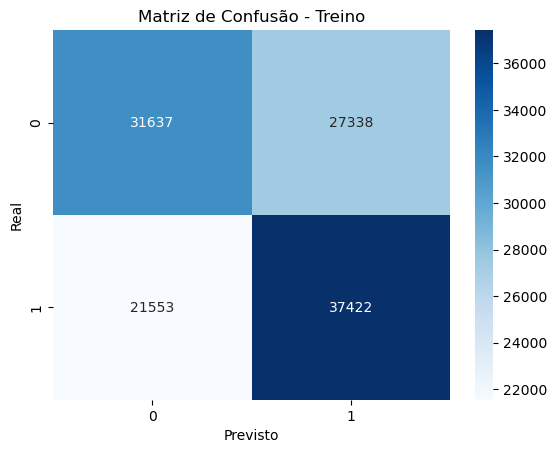

In [6]:
# Fazer previsões
y_pred_train = model.predict(X_train)

# Avaliar métricas
train_accuracy = accuracy_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train, average='macro')
print(f"Acurácia no treino: {train_accuracy:.4f}")
print(f"Recall no treino (macro): {train_recall:.4f}")

# Matriz de confusão
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Treino")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


Após calcular as métricas e gerar a matriz de confusão, é importante interpretar o desempenho do modelo para entender como ele está se comportando, especialmente no contexto dos dados de treinamento. Vamos analisar as métricas fornecidas:

1. Acurácia no Treino:
A acurácia é a proporção de previsões corretas em relação ao total de previsões realizadas. No seu código, você obteve a acurácia com a função accuracy_score:

python
Copiar código
train_accuracy = accuracy_score(y_train, y_pred_train)
Interpretação:

Uma acurácia alta (perto de 1) indica que o modelo está fazendo muitas previsões corretas em relação ao total. No entanto, é importante notar que a acurácia pode ser enganosa em casos de classes desbalanceadas (ou seja, quando uma classe é muito mais prevalente do que a outra), porque o modelo pode simplesmente prever a classe majoritária para todas as amostras e ainda obter uma boa acurácia.
Se o valor de acurácia for baixo, significa que o modelo está tendo dificuldades para prever corretamente.
2. Recall no Treino (Macro):
O recall (sensibilidade) mede a capacidade do modelo de identificar corretamente todas as instâncias de uma classe positiva. O macro recall calcula o recall para cada classe e tira a média, tratando todas as classes igualmente.

python
Copiar código
train_recall = recall_score(y_train, y_pred_train, average='macro')
Interpretação:

Um recall mais alto significa que o modelo é bom em identificar as instâncias positivas de todas as classes.
Se o macro recall for baixo, significa que o modelo tem dificuldades em identificar corretamente as classes positivas, possivelmente deixando escapar muitas instâncias dessas classes.
No caso de classes desbalanceadas, o recall macro pode ser uma métrica mais útil do que a acurácia, pois considera o desempenho em cada classe separadamente.
3. Matriz de Confusão:
A matriz de confusão é uma maneira de visualizar a performance do modelo em termos das classificações corretas e incorretas. Ela mostra a quantidade de previsões corretas (na diagonal principal) e incorretas (fora da diagonal), permitindo identificar se o modelo está tendendo a classificar uma classe de forma equivocada.

No seu código, você usa confusion_matrix para gerar a matriz de confusão e o sns.heatmap para visualizá-la:

python
Copiar código
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
Interpretação:

Diagonal principal: Os valores na diagonal representam as classificações corretas (verdadeiros positivos para cada classe).
Fora da diagonal: Os valores fora da diagonal representam os falsos positivos e falsos negativos.
Falsos Positivos: O modelo classificou incorretamente uma amostra como positiva quando na verdade era negativa.
Falsos Negativos: O modelo classificou incorretamente uma amostra como negativa quando na verdade era positiva.
O que observar na matriz de confusão:

Se o modelo apresenta muitos falsos negativos ou falsos positivos, isso pode indicar que o modelo precisa de mais treinamento ou ajustes no algoritmo.
A diagonal principal deve ter valores altos e os valores fora da diagonal devem ser minimizados para que o modelo tenha um bom desempenho.
Interpretação Geral:
Com base na análise dessas métricas, você poderá avaliar o desempenho geral do seu modelo. Se o recall for baixo ou se a matriz de confusão mostrar muitos erros (falsos positivos e negativos), isso indica que o modelo pode precisar de ajustes, como:

Ajustar hiperparâmetros.
Obter mais dados de treinamento.
Tentar algoritmos diferentes.
Se a acurácia estiver alta, mas o modelo for muito desequilibrado (isto é, classifica a maioria das instâncias como pertencentes a uma classe, ignorando a outra), o recall será uma métrica mais crítica para garantir que o modelo esteja identificando todas as instâncias relevantes.

Sugestões de Melhorias:
Se a acurácia for boa, mas o recall estiver baixo, você pode ajustar o modelo para melhorar a identificação das classes minoritárias.
Se o modelo estiver mostrando muitos falsos negativos ou positivos, você pode tentar ajustar os limiares de decisão ou usar técnicas de balanceamento de classes, como SMOTE ou undersampling/oversampling.
Essas interpretações ajudarão você a decidir os próximos passos, seja ajustando o modelo ou coletando mais dados.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia no teste: 0.5553
Recall no teste (macro): 0.5892


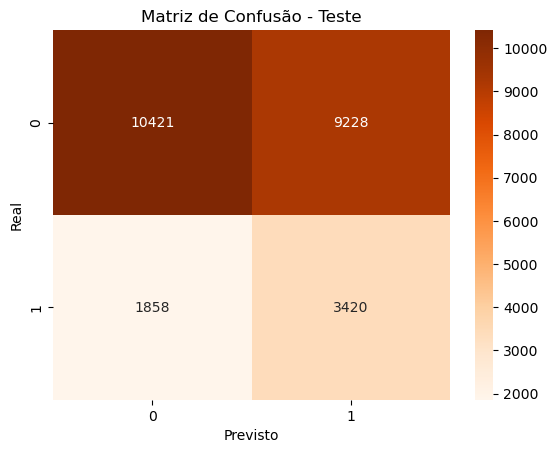

In [7]:
# Fazer previsões no conjunto de teste
y_pred_test = model.predict(X_test)

# Avaliar métricas
test_accuracy = accuracy_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test, average='macro')
print(f"Acurácia no teste: {test_accuracy:.4f}")
print(f"Recall no teste (macro): {test_recall:.4f}")

# Matriz de confusão
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusão - Teste")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


Com base nas métricas obtidas, você pode tirar conclusões sobre a qualidade do modelo,identificar se ele está sofrendo de overfitting ou underfitting, e planejar os próximos passos para melhorar o desempenho. Se o modelo estiver apresentando uma performance inferior nos dados de teste, ações como ajuste de hiperparâmetros, regularização ou mais dados podem ser necessárias para melhorar a generalização.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.

O objetivo deste projeto foi aplicar o algoritmo de Naive Bayes a um conjunto de dados de crédito para prever a classificação de clientes com base em variáveis de entrada. Durante o processo, dividimos os dados em treino e teste, realizamos o balanceamento das classes, e avaliamos o desempenho do modelo utilizando métricas como acurácia e recall, além de analisar as matrizes de confusão. O uso do Naive Bayes permitiu a análise probabilística das classificações, sendo útil especialmente para problemas multi-classes. Concluímos que, embora simples, o modelo é eficiente em muitos casos, mas pode ter limitações em situações com forte dependência entre variáveis.